In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('movies_data_processed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   float64
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1805 non-null   float64
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4996 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.5+ KB


In [3]:
df.dropna(subset=['release_date', 'gross'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2084 entries, 1 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2084 non-null   object 
 1   genres        2084 non-null   object 
 2   type          2084 non-null   object 
 3   rating        2084 non-null   float64
 4   no_of_votes   2084 non-null   float64
 5   meta_score    1930 non-null   float64
 6   release_date  2084 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1612 non-null   float64
 9   countries     2084 non-null   object 
 10  url           2084 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        2084 non-null   object 
dtypes: float64(7), object(6)
memory usage: 227.9+ KB


In [6]:
df


,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.042498,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.417608,Success
5,Puss in Boots: The Last Wish,"Animal Adventure, Computer Animation, Fairy Ta...",Movie,7.8,200000.0,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",https://www.imdb.com/title/tt3915174/?ref_=sr_...,4.352863,Success
15,The Fifth Element,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",Movie,7.6,524000.0,52.0,1997.0,263920180.0,NaN,"France, United Kingdom",https://www.imdb.com/title/tt0119116/?ref_=sr_...,NaN,Success
18,Superman,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",Movie,7.4,195000.0,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",https://www.imdb.com/title/tt0078346/?ref_=sr_...,4.463245,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,Far and Away,"Romantic Epic, Western Epic, Adventure, Drama,...",Movie,6.6,70000.0,49.0,1992.0,137783840.0,60000000.0,United States,https://www.imdb.com/title/tt0104231/?ref_=sr_...,1.296397,Success
4988,Pale Rider,"Drama, Western",Movie,7.3,67000.0,61.0,1985.0,41410568.0,6900000.0,United States,https://www.imdb.com/title/tt0089767/?ref_=sr_...,5.001532,Success
4990,Shanghai Noon,"Buddy Comedy, Martial Arts, Action, Adventure,...",Movie,6.6,138000.0,77.0,2000.0,99274467.0,55000000.0,"United States, Hong Kong",https://www.imdb.com/title/tt0184894/?ref_=sr_...,0.804990,Success
4994,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-0.997933,Fail


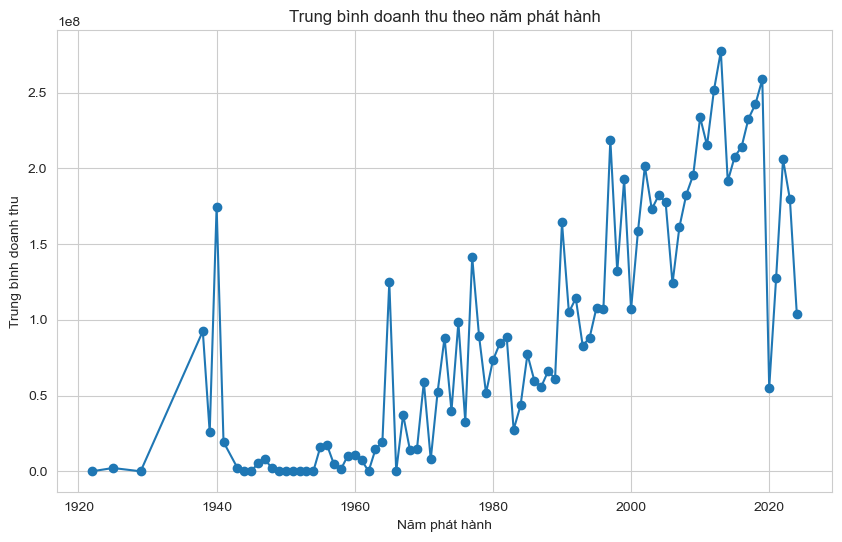

In [7]:
average_gross_by_year = df.groupby('release_date')['gross'].mean().reset_index()
average_gross_by_year = average_gross_by_year[average_gross_by_year['release_date'] <= 2024]
# Bước 3: Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
plt.plot(average_gross_by_year['release_date'], average_gross_by_year['gross'], marker='o')
plt.title('Trung bình doanh thu theo năm phát hành')  # Tiêu đề biểu đồ
plt.xlabel('Năm phát hành')  # Nhãn trục x
plt.ylabel('Trung bình doanh thu')  # Nhãn trục y
plt.grid(True)  # Thêm lưới để dễ quan sát
plt.show()  # Hiển thị biểu đồ